In [1]:
import mlrose as ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
file = "dataset_44_spambase.csv"
data = pd.read_csv(file, header=0)

data.columns = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total","class"]
feature_names = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total"]
label_name = ["class"]
print(len(data), len(data.columns))
data.head()
print(data.columns)

data_features = data
data_features = data_features.drop(labels='class',axis=1)
data_label = data['class']

data_label = data_label.values
data_features = data_features.values

4601 58
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_confe

In [3]:
def plot_2_graphs(param, curves, param_name="", curve_name="",l1="training",l2="testing"):
    plt.figure()
    y1, = plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    y2, = plt.plot(param, curves[1,:],ls='-', marker='+', color='red')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=[y1,y2],labels=[l1, l2], loc='best')
    
    plt.show()
    
def plot_3_graphs(param, curves, param_name="", curve_name="",l1='',l2='',l3=''):
    plt.figure()
    y1, = plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    y2, = plt.plot(param, curves[1,:],ls='-', marker='+', color='red')
    y3, = plt.plot(param, curves[2,:],ls='-', marker='+', color='green')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=[y1,y2],labels=[l1,l2,l3], loc='best')
    
    plt.show()

In [4]:
def plot_graph(param, curves, param_name="", curve_name=""):
    plt.figure()
    plt.plot(param, curves[0,:],ls='-', marker='+' , color='blue')
    
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_features, data_label, test_size=0.2)

In [6]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1,1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1,1)).todense()

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
print(x_train_scaled)

[[0.00000000e+00 7.84313725e-02 1.09803922e-01 ... 4.07643312e-04
  4.00480577e-04 3.15656566e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.53944145e-03
  9.01081298e-04 2.20959596e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.89955904e-04
  4.00480577e-04 3.15656566e-03]
 ...
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 7.83929446e-04
  4.00480577e-04 5.05050505e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.37677609e-03
  2.70324389e-03 5.55555556e-03]
 [1.18942731e-01 0.00000000e+00 0.00000000e+00 ... 8.41744243e-04
  1.70204245e-03 6.62878788e-03]]


In [8]:
geom = ml.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
arith = ml.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
exp = ml.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [9]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']

In [10]:
def NN(algo, hid=[2], it=100, lr=0.0001, maxatt=100, clip=1):
    t = time.time()
    nn_model = ml.NeuralNetwork(hidden_nodes = hid, activation = 'relu', \
                                 algorithm = algo, max_iters = it, \
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, clip_max = clip, max_attempts = maxatt)
    nn_model.fit(x_train_scaled, y_train_hot)
    dt = time.time() - t
    y_train_pred = nn_model.predict(x_train_scaled)
    y_test_pred = nn_model.predict(x_test_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    r = np.zeros((1,3))
    r[0,0] = y_train_accuracy
    r[0,1] = y_test_accuracy
    r[0,2] = dt
    return r

In [99]:
it_size_rhc = [1000,1500,2000,3000,4000,5000,8000,10000,20000,21000,22000]
l_it_rhc = len(it_size_rhc)
it_scores_rhc = np.zeros((3,l_it_rhc))
for i in range(l_it_rhc):
    it_scores_rhc[:,i] = NN(algo=algos[0], hid=[2], it=it_size_rhc[i], lr=0.1, maxatt=100, clip=5)

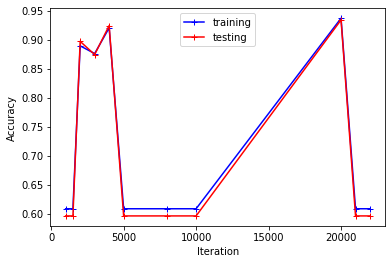

In [100]:
plot_2_graphs(it_size_rhc, it_scores_rhc, param_name="Iteration", curve_name="Accuracy")

In [98]:
lr_size_rhc = [0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2]
l_lr_rhc = len(lr_size_rhc)
lr_scores_rhc = np.zeros((3,l_lr_rhc))
for i in range(l_lr):
    lr_scores_rhc[:,i] = NN(algo=algos[0], hid=[2], it=20000, lr=lr_size_rhc[i], maxatt=100, clip=5)

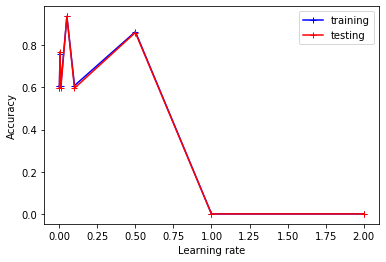

In [101]:
plot_2_graphs(lr_size_rhc, lr_scores_rhc, param_name="Learning rate", curve_name="Accuracy")

In [92]:
print(lr_scores_rhc)

[[ 0.60842391  0.60842391  0.63315217  0.86711957  0.93423913  0.93777174
   0.85815217  0.          0.        ]
 [ 0.59609121  0.59609121  0.62106406  0.88490771  0.92399566  0.93268187
   0.84799131  0.          0.        ]
 [73.99760604 79.69561267 77.52215767 89.04035926 84.14780998 78.23221564
  62.46455598  0.          0.        ]]


In [62]:
clip_size_rhc = [1,2,3,5,10,15,20]
lr_size_clip_rhc = [0.1,0.2,0.3,0.5,1,1.5,2]
l_clip_rhc = len(clip_size_rhc)
clip_scores_rhc = np.zeros((3,l_clip_rhc))
for i in range(l_lr):
    clip_scores_rhc[:,i] = NN(algo=algos[0], hid=[2], it=20000, lr=lr_size_clip_rhc[i], maxatt=100, clip=clip_size_rhc[i])

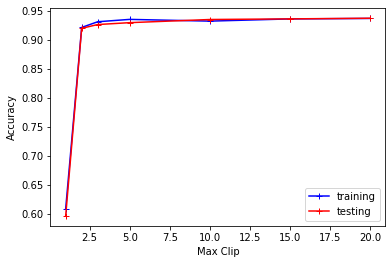

In [63]:
plot_2_graphs(clip_size_rhc, clip_scores_rhc[0:2,:], param_name="Max Clip", curve_name="Accuracy")

In [67]:
print(clip_scores_rhc)

[[ 0.60842391  0.92119565  0.93097826  0.93505435  0.93206522  0.93586957
   0.93668478]
 [ 0.59609121  0.91965255  0.92616721  0.92942454  0.93485342  0.9359392
   0.93702497]
 [64.21254468 62.76731944 60.62424612 61.62941027 60.61145091 70.20728779
  62.65689039]]


In [23]:
############################### SA ###########################################

In [90]:
it_size_sa = [1000,2000,3000,4000,5000,8000,10000,15000,16000,18000,20000]
l_it_sa = len(it_size_sa)
it_scores_sa = np.zeros((3,l_it_sa))
for i in range(l_it_sa):
    it_scores_sa[:,i] = NN(algo=algos[1], hid=[2], it=it_size_sa[i], lr=0.5, maxatt=100, clip=5)

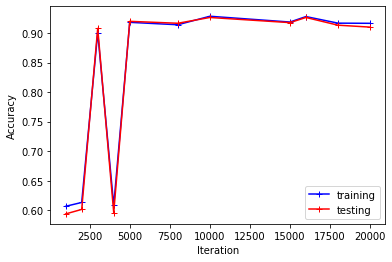

In [91]:
plot_2_graphs(it_size_sa, it_scores_sa, param_name="Iteration", curve_name="Accuracy")

In [95]:
print(it_scores_sa)

[[  0.60679348   0.61331522   0.90054348   0.60842391   0.91793478
    0.9138587    0.92826087   0.91847826   0.92771739   0.91657609
    0.91630435]
 [  0.59391965   0.60152009   0.90770901   0.59609121   0.91965255
    0.91639522   0.92616721   0.917481     0.92616721   0.91313789
    0.90988056]
 [  5.76979256  11.65638375  16.96687126  21.91585493  26.95050836
   41.4636271   52.32781267  80.71104074  82.3764925   93.58558106
  101.64356589]]


In [86]:
lr_size_sa = [0.001,0.005,0.01,0.05,0.1,0.5,1]
l_lr_sa = len(lr_size_sa)
lr_scores_sa = np.zeros((3,l_lr_sa))
for i in range(l_lr_sa):
    lr_scores_sa[:,i] = NN(algo=algos[1], hid=[2], it=20000, lr=lr_size_sa[i], maxatt=100, clip=5)

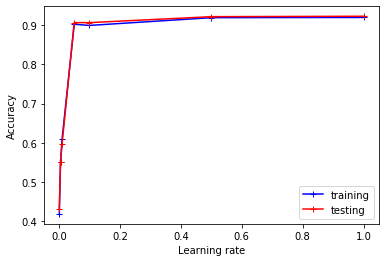

In [87]:
plot_2_graphs(lr_size_sa, lr_scores_sa[0:2,:], param_name="Learning rate", curve_name="Accuracy")

In [93]:
print(lr_scores_sa)

[[  0.41820652   0.55         0.60842391   0.90244565   0.89945652
    0.91929348   0.91983696]
 [  0.4310532    0.5504886    0.59609121   0.90662324   0.90662324
    0.9218241    0.92290988]
 [107.67935944 113.90364361 110.88381553 113.40954876 110.4170661
   98.90365362  92.19414306]]


In [96]:
clip_size_sa = [1,2,5,8,10,12,15,17,20,22,25]
lr_size_clip_sa = [0.1,0.2,0.5,0.8,1,1.2,1.5,1.7,2,2.2,2.5]
l_clip_sa = len(clip_size_sa)
clip_scores_sa = np.zeros((3,l_clip_sa))
for i in range(l_clip_sa):
    clip_scores_sa[:,i] = NN(algo=algos[1], hid=[2], it=20000, lr=lr_size_clip_sa[i], maxatt=100, clip=clip_size_sa[i])

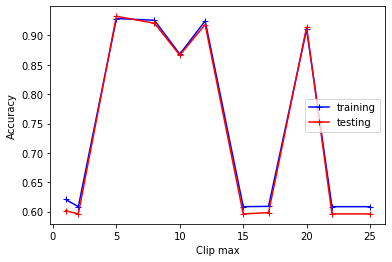

In [97]:
plot_2_graphs(clip_size_sa, clip_scores_sa, param_name="Clip max", curve_name="Accuracy")

In [94]:
print(clip_scores_sa)

[[  0.86440217   0.9138587    0.60842391   0.91413043   0.9201087
    0.60842391   0.86902174   0.90869565   0.92554348   0.90842391
    0.60842391]
 [  0.86970684   0.92508143   0.59609121   0.92508143   0.93159609
    0.59609121   0.87404995   0.92073833   0.92399566   0.91313789
    0.59609121]
 [117.70728111 117.46865606 125.27303052 111.37073517 108.88978004
  115.81299996 109.39242387 102.69808793 108.56960797 102.56766677
  105.56129384]]


In [7]:
def GA(hid=[2], it=100, lr=0.0001, maxatt=100, clip=1):
    t = time.time()
    nn_model = ml.NeuralNetwork(hidden_nodes = hid, activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = it, pop_size=600, 
                                 bias = True, is_classifier = True, learning_rate = lr, \
                                 early_stopping = False, clip_max = clip, max_attempts = maxatt)
    nn_model.fit(x_train_scaled, y_train_hot)
    dt = time.time() - t
    y_train_pred = nn_model.predict(x_train_scaled)
    y_test_pred = nn_model.predict(x_test_scaled)
    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    r = np.zeros((1,3))
    r[0,0] = y_train_accuracy
    r[0,1] = y_test_accuracy
    r[0,2] = dt
    return r

In [17]:
list_it_ga_pop = [50,100,500,800,1000]
l_it_ga_pop = len(list_it_ga_pop)
score_it_ga_pop = np.zeros((3, l_it_ga_pop))
for i in range(l_it_ga_pop):
    score_it_ga_pop[:,i] = GA(hid=[2], it=list_it_ga_pop[i], lr=0.0001, maxatt=100, clip=1)
print(score_it_ga_pop)

[[6.83695652e-01 7.19565217e-01 6.73913043e-01 7.27173913e-01
  7.42934783e-01]
 [7.00325733e-01 7.36156352e-01 6.40608035e-01 7.49185668e-01
  7.76330076e-01]
 [9.54483397e+01 1.80636842e+02 8.81527870e+02 1.41788820e+03
  1.77111257e+03]]


In [15]:
list_lr_ga_pop = [0.0001,0.001,0.01,0.05,0.1]
l_lr_ga_pop = len(list_lr_ga_pop)
score_lr_ga_pop = np.zeros((3, l_it_ga_pop))
for i in range(l_lr_ga_pop):
    score_lr_ga_pop[:,i] = GA(hid=[2], it=100, lr=list_lr_ga_pop[i], maxatt=100, clip=1)
print(score_lr_ga_pop)

[[  0.72608696   0.65951087   0.72771739   0.63668478   0.67690217]
 [  0.75461455   0.68403909   0.77633008   0.66558089   0.71986971]
 [166.82753921 174.39908171 184.84881067 181.32639217 172.25893903]]


In [65]:
############################### GA ###########################################
score = NN(algo=algos[2], hid=[2], it=10, lr=0.0001, maxatt=100, clip=1)
print(score)

[[0.62853261 0.61563518 7.90508199]]


In [75]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.0001, maxatt=100, clip=1)
print(score)

[[ 0.68179348  0.68295331 28.93686152]]


In [68]:
score = NN(algo=algos[2], hid=[2], it=100, lr=0.0001, maxatt=100, clip=1)
print(score)

[[ 0.70625     0.66666667 56.12113643]]


In [69]:
score = NN(algo=algos[2], hid=[2], it=500, lr=0.0001, maxatt=100, clip=1)
print(score)

[[  0.70434783   0.69923996 282.26622367]]


In [76]:
score = NN(algo=algos[2], hid=[2], it=800, lr=0.0001, maxatt=100, clip=1)
print(score)

[[  0.74673913   0.74592834 439.56784987]]


In [75]:
###################### table 2 ################################3
score = NN(algo=algos[2], hid=[2], it=50, lr=0.0001, maxatt=100, clip=1)
print(score)

[[ 0.68179348  0.68295331 28.93686152]]


In [70]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.001, maxatt=100, clip=1)
print(score)

[[ 0.73016304  0.69163952 27.88693738]]


In [82]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.01, maxatt=100, clip=1)
print(score)

[[ 0.60815217  0.59717698 31.0723505 ]]


In [81]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.05, maxatt=100, clip=1)
print(score)

[[ 0.61630435  0.60803474 30.49621367]]


In [80]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.1, maxatt=100, clip=1)
print(score)

[[ 0.60815217  0.59717698 30.7907362 ]]


In [71]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.0001, maxatt=100, clip=2)
print(score)

[[ 0.73016304  0.69923996 27.42171216]]


In [77]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.001, maxatt=100, clip=2)
print(score)

[[ 0.60543478  0.59934853 27.51627421]]


In [74]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.01, maxatt=100, clip=2)
print(score)

[[ 0.7375      0.74049946 27.86795044]]


In [79]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.05, maxatt=100, clip=2)
print(score)

[[ 0.76222826  0.76547231 28.85000682]]


In [78]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.1, maxatt=100, clip=2)
print(score)

[[ 0.60815217  0.59717698 30.51304078]]


In [67]:
########### table 3 ###################
score = NN(algo=algos[2], hid=[5], it=50, lr=0.0001, maxatt=100, clip=1)
print(score)

[[ 0.60815217  0.59717698 30.930264  ]]


In [73]:
score = NN(algo=algos[2], hid=[2], it=50, lr=0.05, maxatt=100, clip=5)
print(score)

[[ 0.63722826  0.62540717 28.39804816]]


In [77]:
from sklearn.neural_network import MLPClassifier
def nn_mlp(hls=96, lr=0.001):
    
    mlp = MLPClassifier(hidden_layer_sizes=(hls,), solver='adam', activation='logistic', max_iter=1000,
                        learning_rate_init=lr, random_state=99)
    mlp.fit(x_train_scaled, y_train_hot)
    
    score = np.zeros((1,2))
    y_train_pred = mlp.predict(x_train_scaled)
    y_test_pred = mlp.predict(x_test_scaled)
    y_train_accuracy = accuracy_score(y_train_pred, y_train_hot)
    y_test_accuracy = accuracy_score(y_test_pred, y_test_hot)
    score[0,0] = y_train_accuracy
    score[0,1] = y_test_accuracy
    print(score)
    
    return score

In [80]:
nn_mlp(hls=2)

[[0.93396739 0.93376764]]


array([[0.93396739, 0.93376764]])

In [84]:
hidden_layers = [1,2,3,5,7,8,11,15,20,35,50] 
l_hid=len(hidden_layers)
scores_hidden_layers = np.zeros((2, l_hid))
for i in range(l_hid):
    scores_hidden_layers[:,i] = nn_mlp(hls=hidden_layers[i])

[[0.93342391 0.93268187]]
[[0.93396739 0.93376764]]
[[0.93233696 0.93485342]]
[[0.93369565 0.93159609]]
[[0.93342391 0.93051031]]
[[0.93315217 0.93485342]]
[[0.93342391 0.93376764]]
[[0.93288043 0.93268187]]
[[0.93125    0.92942454]]
[[0.93233696 0.93051031]]
[[0.93233696 0.93051031]]


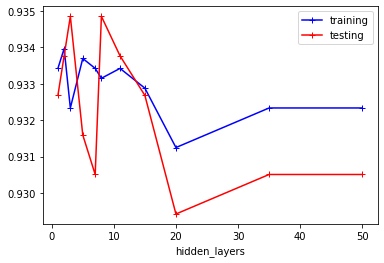

In [85]:
plot_2_graphs(param=hidden_layers, curves=scores_hidden_layers[0:2,:], param_name='hidden_layers')